In [12]:
import pandas as pd


# In this project I have about five years of bitcoin data and will try to predict the price of a bitcoin based on features such as:

transaction volume

adjusted transaction volume

transaction count

exchange volume

active addresses on the bitcoin network

payment count



# The source of the data is:

https://coinmetrics.io/data-downloads/

It is found there as a sample downloads of the core bitcoin

In [75]:
cd Downloads/

[Errno 2] No such file or directory: 'Downloads/'
/Users/jja/Downloads


In [94]:
#load the data
coins = pd.read_csv('btc.csv')

In [103]:
#Looking at the data
print(coins.info())
print(coins.head(10)) #lots of nan values so will drop those


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 16 columns):
date                     3630 non-null object
txVolume(USD)            2054 non-null float64
adjustedTxVolume(USD)    2054 non-null float64
txCount                  3624 non-null float64
marketcap(USD)           2054 non-null float64
price(USD)               2054 non-null float64
exchangeVolume(USD)      2054 non-null float64
generatedCoins           3624 non-null float64
fees                     3624 non-null float64
activeAddresses          3624 non-null float64
averageDifficulty        3624 non-null float64
paymentCount             3624 non-null float64
medianTxValue(USD)       2054 non-null float64
medianFee                3370 non-null float64
blockSize                3624 non-null float64
blockCount               3624 non-null float64
dtypes: float64(15), object(1)
memory usage: 453.8+ KB
None
         date  txVolume(USD)  adjustedTxVolume(USD)  txCount  marketcap(USD)  \
0 

In [89]:
print(coins.tail()) # the tail looks good so missing values are at the beginning

            txVolume(USD)  adjustedTxVolume(USD)   txCount  marketcap(USD)  \
date                                                                         
2018-12-07   3.245898e+09           1.954238e+09  253776.0    6.116086e+10   
2018-12-08   1.820630e+09           1.032260e+09  230977.0    5.958747e+10   
2018-12-09   1.411352e+09           8.297622e+08  238441.0    6.048663e+10   
2018-12-10   2.445503e+09           1.404935e+09  258229.0    6.290965e+10   
2018-12-11   2.717322e+09           1.549684e+09  251362.0    6.092103e+10   

            price(USD)  exchangeVolume(USD)  generatedCoins       fees  \
date                                                                     
2018-12-07     3512.59         6.835615e+09     1425.000000  31.195356   
2018-12-08     3421.91         5.305024e+09     1587.500000  19.752363   
2018-12-09     3473.23         4.947373e+09     1600.000000  16.833588   
2018-12-10     3612.05         5.020969e+09     1550.000000  22.972834   
2018-12-1

In [104]:
print(coins.describe()) #The data description the data

       txVolume(USD)  adjustedTxVolume(USD)        txCount  marketcap(USD)  \
count   2.054000e+03           2.054000e+03    3624.000000    2.054000e+03   
mean    2.742071e+09           1.145396e+09  100230.227925    3.799228e+10   
std     5.138994e+09           1.963236e+09  104868.819635    5.841710e+10   
min     3.287234e+07           2.053871e+07       0.000000    7.794864e+08   
25%     2.535014e+08           1.035062e+08    5244.500000    4.400190e+09   
50%     8.038770e+08           2.871292e+08   60114.000000    8.201333e+09   
75%     3.464068e+09           1.645795e+09  195987.750000    4.443941e+10   
max     4.835307e+10           1.624809e+10  490459.000000    3.261873e+11   

         price(USD)  exchangeVolume(USD)  generatedCoins         fees  \
count   2054.000000         2.054000e+03     3624.000000  3624.000000   
mean    2294.390531         1.473214e+09     4806.300647    51.396149   
std     3430.644899         3.048856e+09     2820.469004   107.494067   
min  

In [105]:
#I look at the info for the data again to observe the nature of missing values.
#There is some missing values
print(coins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 16 columns):
date                     3630 non-null object
txVolume(USD)            2054 non-null float64
adjustedTxVolume(USD)    2054 non-null float64
txCount                  3624 non-null float64
marketcap(USD)           2054 non-null float64
price(USD)               2054 non-null float64
exchangeVolume(USD)      2054 non-null float64
generatedCoins           3624 non-null float64
fees                     3624 non-null float64
activeAddresses          3624 non-null float64
averageDifficulty        3624 non-null float64
paymentCount             3624 non-null float64
medianTxValue(USD)       2054 non-null float64
medianFee                3370 non-null float64
blockSize                3624 non-null float64
blockCount               3624 non-null float64
dtypes: float64(15), object(1)
memory usage: 453.8+ KB
None


In [106]:
#I see that no missing values recorded after April 27 2013
#So I drop all values before this date.
#I check by printing ten rows before and after that date
print(coins.iloc[1570:1580])

            date  txVolume(USD)  adjustedTxVolume(USD)  txCount  \
1570  2013-04-22            NaN                    NaN  47041.0   
1571  2013-04-23            NaN                    NaN  61500.0   
1572  2013-04-24            NaN                    NaN  64861.0   
1573  2013-04-25            NaN                    NaN  62394.0   
1574  2013-04-26            NaN                    NaN  55093.0   
1575  2013-04-27            NaN                    NaN  44222.0   
1576  2013-04-28   6.879868e+07           3.153714e+07  41702.0   
1577  2013-04-29   1.138128e+08           4.821652e+07  51602.0   
1578  2013-04-30   8.426632e+07           5.686790e+07  47450.0   
1579  2013-05-01   1.206825e+08           8.208736e+07  55176.0   

      marketcap(USD)  price(USD)  exchangeVolume(USD)  generatedCoins  \
1570             NaN         NaN                  NaN       3825.0000   
1571             NaN         NaN                  NaN       4200.0000   
1572             NaN         NaN           

In [108]:
#I delete the missing values
coins = coins.dropna()
#Then I check if new data frame has no missing values:
coins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 1576 to 3629
Data columns (total 16 columns):
date                     2054 non-null object
txVolume(USD)            2054 non-null float64
adjustedTxVolume(USD)    2054 non-null float64
txCount                  2054 non-null float64
marketcap(USD)           2054 non-null float64
price(USD)               2054 non-null float64
exchangeVolume(USD)      2054 non-null float64
generatedCoins           2054 non-null float64
fees                     2054 non-null float64
activeAddresses          2054 non-null float64
averageDifficulty        2054 non-null float64
paymentCount             2054 non-null float64
medianTxValue(USD)       2054 non-null float64
medianFee                2054 non-null float64
blockSize                2054 non-null float64
blockCount               2054 non-null float64
dtypes: float64(15), object(1)
memory usage: 272.8+ KB


In [109]:
#I convert the date column to a datetime:
coins['date'] =  pd.to_datetime(coins['date'], format='%Y-%m-%d')
#I confirm by printing info
print(coins.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 1576 to 3629
Data columns (total 16 columns):
date                     2054 non-null datetime64[ns]
txVolume(USD)            2054 non-null float64
adjustedTxVolume(USD)    2054 non-null float64
txCount                  2054 non-null float64
marketcap(USD)           2054 non-null float64
price(USD)               2054 non-null float64
exchangeVolume(USD)      2054 non-null float64
generatedCoins           2054 non-null float64
fees                     2054 non-null float64
activeAddresses          2054 non-null float64
averageDifficulty        2054 non-null float64
paymentCount             2054 non-null float64
medianTxValue(USD)       2054 non-null float64
medianFee                2054 non-null float64
blockSize                2054 non-null float64
blockCount               2054 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 272.8 KB
None


In [110]:
#I change the date into the index:
coins.set_index('date', inplace=True)
coins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2054 entries, 2013-04-28 to 2018-12-11
Data columns (total 15 columns):
txVolume(USD)            2054 non-null float64
adjustedTxVolume(USD)    2054 non-null float64
txCount                  2054 non-null float64
marketcap(USD)           2054 non-null float64
price(USD)               2054 non-null float64
exchangeVolume(USD)      2054 non-null float64
generatedCoins           2054 non-null float64
fees                     2054 non-null float64
activeAddresses          2054 non-null float64
averageDifficulty        2054 non-null float64
paymentCount             2054 non-null float64
medianTxValue(USD)       2054 non-null float64
medianFee                2054 non-null float64
blockSize                2054 non-null float64
blockCount               2054 non-null float64
dtypes: float64(15)
memory usage: 256.8 KB


In [238]:
#I check to see the datetime index works
coins.loc['2017-05-15']
coins.loc['2017-05']
#Very Nice!

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
date,,,,,,,,,,,,,,,
2017-05-01,1.918429e+09,8.719435e+08,294636.0,2.198435e+10,1348.30,7.136240e+08,1875.0,227.748866,707250.0,5.219745e+11,416309.0,139.071833,0.000486,146613134.0,150.0
2017-05-02,2.210500e+09,8.974066e+08,333003.0,2.317304e+10,1421.03,4.773380e+08,1975.0,272.679662,787411.0,5.219745e+11,467071.0,156.212762,0.000486,154877624.0,158.0
2017-05-03,2.248210e+09,1.019610e+09,295017.0,2.370946e+10,1453.78,5.837960e+08,1650.0,247.343677,690007.0,5.219745e+11,411026.0,174.260320,0.000500,131378395.0,132.0
2017-05-04,2.984660e+09,1.181183e+09,354569.0,2.431506e+10,1490.72,9.335490e+08,2100.0,307.095681,851802.0,5.219745e+11,531831.0,175.663434,0.000504,163135853.0,168.0
2017-05-05,3.022035e+09,1.210534e+09,267064.0,2.513554e+10,1540.87,9.460360e+08,1612.5,261.311685,663371.0,5.219745e+11,411634.0,230.404843,0.000542,124000717.0,129.0
2017-05-06,2.264647e+09,1.029734e+09,362854.0,2.539885e+10,1556.81,5.825300e+08,2100.0,296.573693,872106.0,5.219745e+11,510468.0,149.524206,0.000493,162108773.0,168.0
2017-05-07,2.270631e+09,9.889647e+08,315844.0,2.577178e+10,1579.47,1.080030e+09,2087.5,277.035750,787633.0,5.219745e+11,443744.0,147.619446,0.000493,161127686.0,167.0
2017-05-08,3.110918e+09,1.359363e+09,364916.0,2.606016e+10,1596.92,1.340320e+09,2250.0,316.449553,889537.0,5.219745e+11,530411.0,177.520191,0.000500,174265948.0,180.0
2017-05-09,3.371637e+09,1.384253e+09,332724.0,2.813550e+10,1723.89,1.167920e+09,1937.5,302.961534,794529.0,5.219745e+11,464926.0,229.914640,0.000527,153106911.0,155.0


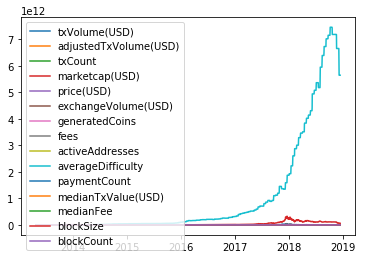

In [211]:
#Plotting all the features as a time series in time:
import matplotlib.pyplot as plt
plt.plot(coins)
# plt.plot(coins['price(USD)'])
# plt.plot(coins.iloc[:,5:])
plt.legend(coins.columns, loc=2)
plt.show()

#Very hard to see the plot. Too many features.
#The price plot dominates the rest 
#Lets fix this.

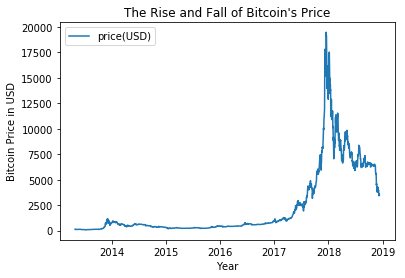

In [222]:
#Lets look at price by itself:
plt.plot(coins['price(USD)'])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Bitcoin Price in USD')
plt.title('The Rise and Fall of Bitcoin\'s Price')
plt.show()
#We see the beast was lying dormant for almost four years. Then the big eruption came in 2017
#Finally we see the big drop in 2018

No handles with labels found to put in legend.


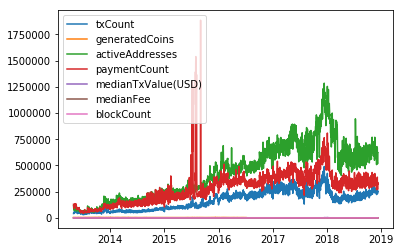

In [247]:
#Lets plot everything else without the price:
graph = coins.drop(['price(USD)', 'marketcap(USD)', 'fees', 'averageDifficulty', 'txVolume(USD)', 'adjustedTxVolume(USD)', 'exchangeVolume(USD)', 'blockSize' ], axis=1)
plt.plot(graph)
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(graph.columns, loc=2)
plt.show()
#I see the payment Count spikes in 2015. Will graph by itself in next code.

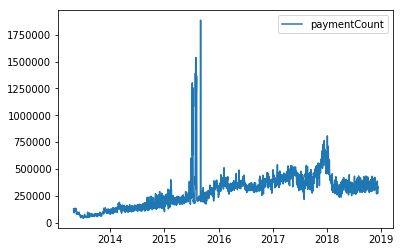

In [243]:
#Lets plot everything else without the price:
plt.plot(coins['paymentCount'])
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend()
plt.show()


 Something interesting happened with the payment counts in the middleof 2015, I wonder what it is?

No handles with labels found to put in legend.


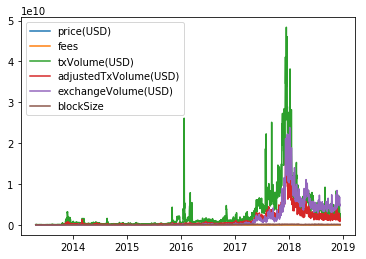

In [258]:
graph2 = coins[['price(USD)', 'fees', 'txVolume(USD)', 'adjustedTxVolume(USD)', 'exchangeVolume(USD)', 'blockSize'] ]
plt.plot(graph2)
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(graph2.columns, loc=2)
plt.show()

 From the plot above we see the transaction volume and other features are correlated

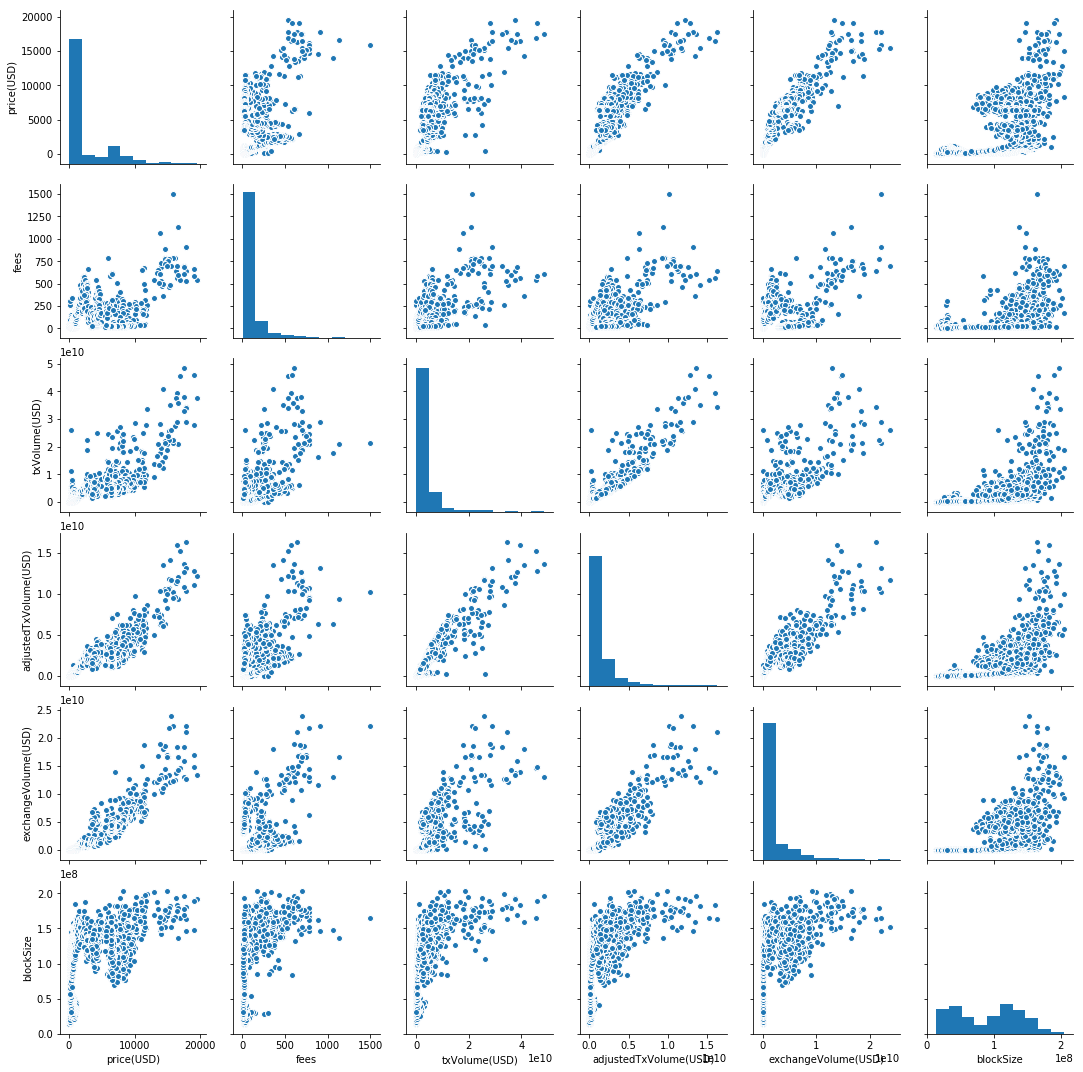

In [268]:
#I think a pair plot is useful to see the correlation. Lets make one:
import seaborn as sns 
sns.pairplot(graph2) #We see a lot of linear relationship between price and volume 

In [267]:
#Preparing the data for linear regression:
features = graph2.drop('price(USD)', axis = 1)
target = graph2['price(USD)']

In [274]:
#Train and split the data:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.3, random_state=42)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [287]:
#Creating a linear regression to predict price based on available features:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

result = lr.score(X_test, y_test)

print('The prediction score is: ', result)

#Then will check the root mean squared error 
from sklearn.metrics import mean_squared_error
import numpy as np  #for square rooting mse

mse = mean_squared_error(y_test, y_pred)
print('root mean squared error: ', np.sqrt(mse) )
#will also calculate the r_squared score
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
print('r-squared: ', r2)

The prediction score is:  0.9213164681952379
root mean squared error:  930.5253207430472
r-squared:  0.9213164681952379


Text(0,0.5,'Predicted price')

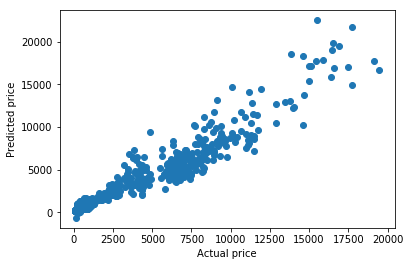

In [290]:
#Here is a visual of our prediction 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

At this point, we can say that price is correlated to our features and can be estimated based on the features. This prediction may need to look correlation between time differences between present and 5 day lag values to see if the correlation wil continue to exist.